In [11]:
%load_ext autoreload
%autoreload 2

import matplotlib
matplotlib.use('nbagg')
%matplotlib inline
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Saving as a scenario

In [12]:
!ls ../mat/*

../mat/line_fresnelastique.npy ../mat/line_vague_solo.npy
../mat/line_vague_dense.npy    ../mat/master.npy


In [37]:
%%writefile ../scenario_line_master.py
#!/usr/bin/env python
# -*- coding: utf8 -*-

import elasticite as el
import numpy as np
import os

def master(e, filename):
    if e.structure: N_lame = e.N_lame-e.struct_N
    else: N_lame = e.N_lame

    def montage(z, z_in):
        z_out = z.copy()
        z_s = z_in.copy()
        print (z_out[0, 0], z_out[-1, 0], z_s[0, 0], z_s[-1, 0])
        z_s[:, 0] += z_out[-1, 0] #+ 1./e.desired_fps # increment the time on the new array
        print (z_out.shape, z_s.shape, z_s[0, 0], z_s[-1, 0])
        return np.vstack((z_out, z_s))

    matpath = 'mat/'
    z_s = {}
    for scenario in ['line_vague_dense', 'line_vague_solo', 'line_fresnelastique']:
        z_s[scenario] = np.load(os.path.join(matpath, scenario + '.npy'))
    
    ###########################################################################
    burnout_time = 4.
    z = np.zeros((1, N_lame+1)) # zero at zero
    z = np.vstack((z, np.hstack((np.array(burnout_time), np.zeros(N_lame) ))))
    for _ in range(36):
        ###########################################################################
        #z = montage(z, z_s['line_vague_dense'])
        ###########################################################################
        #z = montage(z, z_s['line_vague_solo'])
        ###########################################################################
        z = montage(z, z_s['line_fresnelastique'])
        ###########################################################################
        #z = montage(z, z_s['line_vague_dense'])
    
    ###########################################################################
    # save the file
    np.save(filename, z)

        

if __name__ == "__main__":
    import sys
    if len(sys.argv)>1: mode = sys.argv[1]
    else: mode = 'both'
        
    filename='mat/master.npy'
    
    e = el.EdgeGrid(N_lame=25, grid_type='line', mode=mode,
                 verb=True, filename=filename)

    if mode == 'writer':
        master(e, filename)
    else:
        # running the code
        el.main(e)


Overwriting ../scenario_line_master.py


In [38]:
%cd ..
%run  scenario_line_master.py writer
%cd posts

/Users/laurentperrinet/pool/Dropbox/py-elasticite
0.0 4.0 0.0 119.966666667
(2, 26) (3600, 26) 4.0 123.966666667
0.0 123.966666667 0.0 119.966666667
(3602, 26) (3600, 26) 123.966666667 243.933333333
0.0 243.933333333 0.0 119.966666667
(7202, 26) (3600, 26) 243.933333333 363.9
0.0 363.9 0.0 119.966666667
(10802, 26) (3600, 26) 363.9 483.866666667
0.0 483.866666667 0.0 119.966666667
(14402, 26) (3600, 26) 483.866666667 603.833333333
0.0 603.833333333 0.0 119.966666667
(18002, 26) (3600, 26) 603.833333333 723.8
0.0 723.8 0.0 119.966666667
(21602, 26) (3600, 26) 723.8 843.766666667
0.0 843.766666667 0.0 119.966666667
(25202, 26) (3600, 26) 843.766666667 963.733333333
0.0 963.733333333 0.0 119.966666667
(28802, 26) (3600, 26) 963.733333333 1083.7
0.0 1083.7 0.0 119.966666667
(32402, 26) (3600, 26) 1083.7 1203.66666667
0.0 1203.66666667 0.0 119.966666667
(36002, 26) (3600, 26) 1203.66666667 1323.63333333
0.0 1323.63333333 0.0 119.966666667
(39602, 26) (3600, 26) 1323.63333333 1443.6
0.0 1443

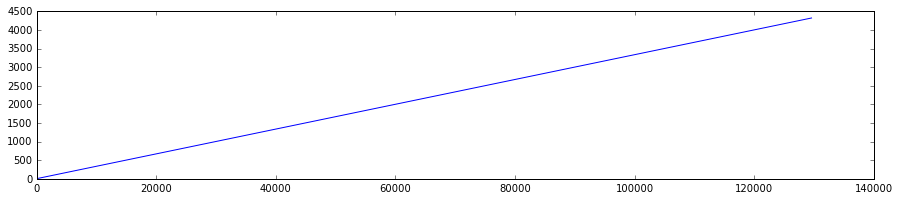

In [ ]:
z = np.load('../mat/master.npy')
fig, ax = plt.subplots(figsize=(15, 3))
_ = ax.plot(z[:, 0])

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
_ = ax.plot(z[:, 0], z[:, 1:])

## git


In [17]:
#! git add 2015-11-26*
!git s

 M ../mat/master.npy
 M "2015-10-14 \303\251lasticit\303\251, Fresnel.ipynb"
?? ../.gitignore_conflict-20151125-105937
?? "2015-11-02 \303\251lasticit\303\251 expansion en miroir - exploration param\303\250tres_conflict-20151125-105824.ipynb"
?? "2015-11-02 \303\251lasticit\303\251 expansion en miroir - principes_conflict-20151123-174335.ipynb"
?? "2015-11-17 \303\251lasticit\303\251 expansion en miroir - dynamique d'un point focal2.ipynb"
?? "2015-11-17 \303\251lasticit\303\251 expansion en miroir - dynamique d'un point focal_conflict-20151123-174338.ipynb"
?? ../scenario_line_fresnel_conflict-20151123-162407.py
?? ../src/elasticite_conflict-20151123-173759.py


In [18]:
!git commit -am' scenario master '

[master eaf6ddb]  scenario master
 2 files changed, 43 insertions(+), 4 deletions(-)


In [19]:
! git push

Counting objects: 21, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (21/21), done.
Writing objects: 100% (21/21), 197.75 KiB | 0 bytes/s, done.
Total 21 (delta 15), reused 0 (delta 0)
To git@git.framasoft.org:laurentperrinet/elasticte.git
   f5634ef..eaf6ddb  master -> master
